![](https://images.pexels.com/photos/2541310/pexels-photo-2541310.jpeg?cs=srgb&dl=white-lantern-lot-2541310.jpg&fm=jpg)

# IMU Calibration

Kevin J. Walchko

29 March 2020

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>

---

Taking another shot at calibrating an inertial measurement unit (IMU), but using some different tools. This time I am using:

- pandas: manipulating data
- seaborn: plotting
- matplotlib: plotting
- the_collector: reading/writing sensor data packets to disk

In [1]:
import numpy as np

import the_collector
from the_collector import BagIt, Pickle, Data

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns

# Accelerometers: Static

In [2]:
# Create a bag reader
bag = BagIt(Pickle)

>>  pickle


In [3]:
# NXP IMU
still = bag.read('data-still.pickle.bag')

# let's list the keys and make it look pretty
print('Bag keys:')
print('-'*30)
for k in still.keys():
    print(f'  {k:7}: {len(still[k])}')

>> Reading[pickle]: data-still.pickle.bag
Bag keys:
------------------------------
  accel  : 10000
  mag    : 10000
  gyro   : 10000


In [27]:
def get_sensor_df(bag):
    data = {
        "x": [],
        "y": [],
        "z": [],
        "ts": []
    }

    for d in bag["accel"]:
        x,y,z = d.data
        ts = d.timestamp
        data["x"].append(x)
        data["y"].append(y)
        data["z"].append(z)
        data["ts"].append(ts)


    df = pd.DataFrame(data)
    return df

adf = get_sensor_df(still)
# df = df.transpose()
adf.head()

,x,y,z,ts
0,0.018544,-0.031232,1.023824,1.562432e+09
1,0.018544,-0.031232,1.023824,1.562432e+09
2,0.020008,-0.032208,1.024312,1.562432e+09
3,0.020008,-0.032208,1.024312,1.562432e+09
4,0.017568,-0.030012,1.024312,1.562432e+09


In [5]:
adf.describe()

,x,y,z,ts
count,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,0.017734,-0.031530,1.024179,1.562432e+09
std,0.000954,0.000932,0.001158,1.472064e+01
min,0.014640,-0.034648,1.018456,1.562432e+09
25%,0.017080,-0.032208,1.023336,1.562432e+09
50%,0.017812,-0.031476,1.024068,1.562432e+09
75%,0.018300,-0.030988,1.025044,1.562432e+09
max,0.021472,-0.028304,1.032608,1.562432e+09


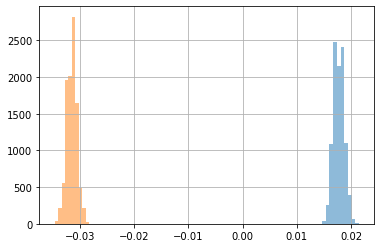

In [6]:
for col in ["x", "y"]:
    plt.hist(adf[col], alpha=0.5)
plt.grid(True)

In [7]:
nadf = pd.DataFrame(columns=None)
for k, m in zip(adf.keys(), adf.mean()):
    if k == "ts": continue  # ignore timestamp
    if k == "z": m = m-1.0  # remove gravity
    nadf[k] = adf[k] - m

In [8]:
nadf.describe()

,x,y,z
count,1.000000e+04,1.000000e+04,10000.000000
mean,-1.023936e-15,-2.681369e-16,1.000000
std,9.538002e-04,9.323042e-04,0.001158
min,-3.093725e-03,-3.117637e-03,0.994277
25%,-6.537248e-04,-6.776368e-04,0.999157
50%,7.827520e-05,5.436320e-05,0.999889
75%,5.662752e-04,5.423632e-04,1.000865
max,3.738275e-03,3.226363e-03,1.008429


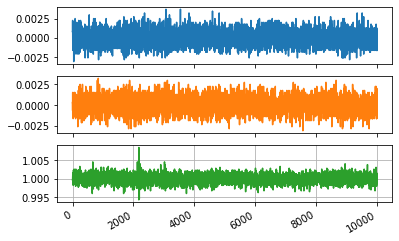

In [9]:
nadf.plot(subplots=True, legend=False)
plt.grid(True);

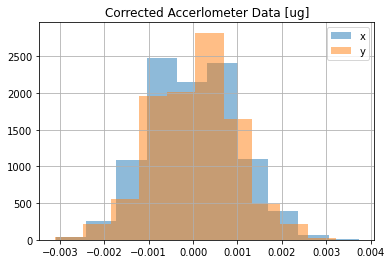

In [10]:
for col in ["x", "y"]:
    plt.hist(nadf[col], alpha=0.5, label=col)
plt.legend()
plt.title("Corrected Accerlometer Data [ug]")
plt.grid(True)

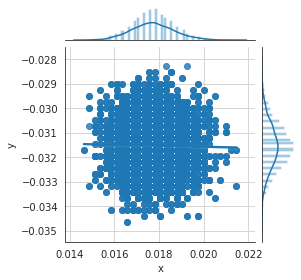

In [11]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=adf, kind='reg', height=4)
plt.grid(True)

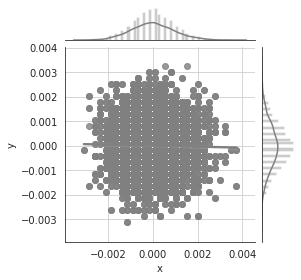

In [12]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data=nadf, kind='reg', color="gray", height=4)
plt.grid(True)

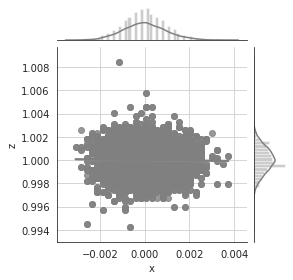

In [13]:
with sns.axes_style('white'):
    sns.jointplot("x", "z", data=nadf, kind='reg', color="gray", height=4)
plt.grid(True)

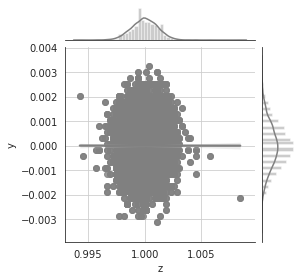

In [14]:
with sns.axes_style('white'):
    sns.jointplot("z", "y", data=nadf, kind='reg', color="gray", height=4)
plt.grid(True)

# Gyroscopes: Spin

In [15]:
# TBD

# Magnetometers: Tumble

In [28]:
tumble = bag.read('data-tumble.pickle.bag')

mdf = get_sensor_df(tumble)
mdf.head()

>> Reading[pickle]: data-tumble.pickle.bag


,x,y,z,ts
0,0.013664,-0.048312,1.025288,1.562430e+09
1,0.013664,-0.048312,1.025288,1.562430e+09
2,0.014396,-0.047824,1.023336,1.562430e+09
3,0.014396,-0.047824,1.023336,1.562430e+09
4,0.014884,-0.047092,1.023336,1.562430e+09


In [17]:
mdf.describe()

,x,y,z,ts
count,10000.000000,10000.00000,10000.000000,1.000000e+04
mean,-14.322180,-33.34369,28.493880,1.562430e+09
std,20.591235,28.31826,23.431001,1.471885e+01
min,-52.200000,-73.70000,-1.200000,1.562430e+09
25%,-27.700000,-54.90000,9.000000,1.562430e+09
50%,-18.800000,-46.20000,20.300000,1.562430e+09
75%,-3.800000,-4.80000,41.900000,1.562430e+09
max,38.300000,23.40000,87.600000,1.562430e+09


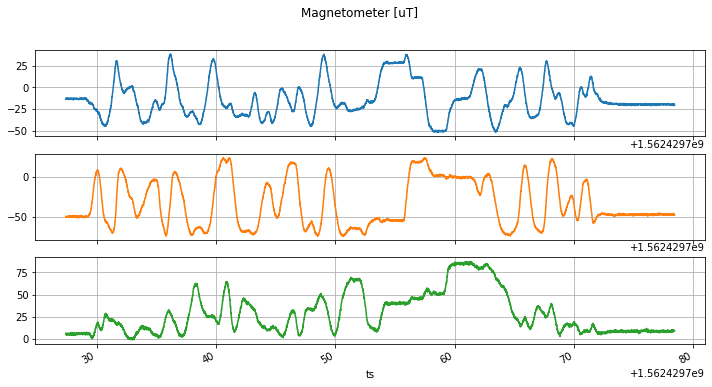

In [18]:
# df.plot(subplots=True, x="ts")
mdf.plot(x="ts", subplots=True, 
         layout=(3,1), legend=False, 
         grid=True, figsize=(12,6), 
         title="Magnetometer [uT]");

In [19]:
def plotMag(labels, df):
    a,b,c = labels
    x = df[a]
    y = df[b]
    z = df[c]
    plt.plot(x,y,'.b', x,z,'.r', z,y, '.g')
    plt.xlabel('$\mu$T')
    plt.ylabel('$\mu$T')
    plt.axis('equal')
    plt.grid(True);
    plt.legend([a, b, b]);

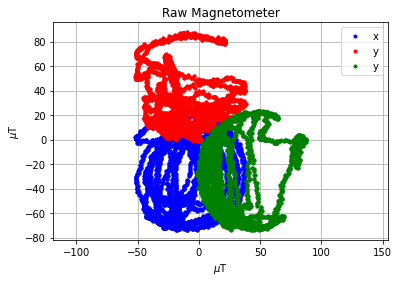

In [20]:
plotMag(["x", "y", "z"], mdf)
plt.title("Raw Magnetometer");

In [21]:
mx, my, mz, _ = (mdf.max() - mdf.min())/2

In [22]:
nmdf = pd.DataFrame(columns=None)
for k, m in zip(mdf.keys(), mdf.mean()):
    if k == "ts": continue
    nmdf[k] = mdf[k] - m
nmdf.describe()

,x,y,z
count,1.000000e+04,1.000000e+04,1.000000e+04
mean,-6.548362e-14,-1.382432e-14,-2.059096e-13
std,2.059124e+01,2.831826e+01,2.343100e+01
min,-3.787782e+01,-4.035631e+01,-2.969388e+01
25%,-1.337782e+01,-2.155631e+01,-1.949388e+01
50%,-4.477820e+00,-1.285631e+01,-8.193880e+00
75%,1.052218e+01,2.854369e+01,1.340612e+01
max,5.262218e+01,5.674369e+01,5.910612e+01


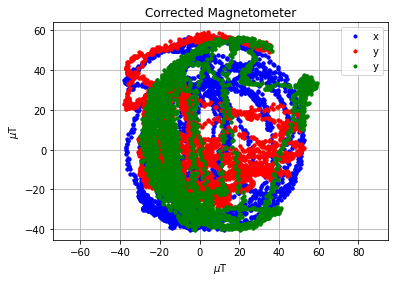

In [23]:
plotMag(["x", "y", "z"], nmdf)
plt.title("Corrected Magnetometer");

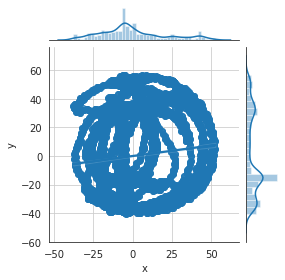

In [24]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=nmdf, kind='reg', height=4)
plt.grid(True)

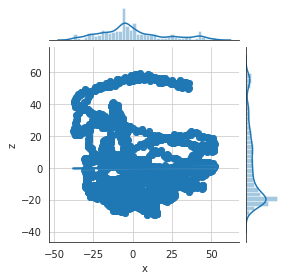

In [25]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="z", data=nmdf, kind='reg', height=4)
plt.grid(True)

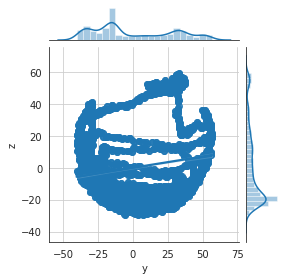

In [26]:
with sns.axes_style('white'):
    sns.jointplot(x="y", y="z", data=nmdf, kind='reg', height=4)
plt.grid(True)